In [1]:
# importing the required libraries

import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the 'Loan data-set'

loan = pd.read_csv('/content/loan.csv', low_memory=False)

In [3]:
# reading the data-set

loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
# checking for the rows and columns count

loan.shape

(39717, 111)

# <font color='BLUE'>Data Cleaning process

In [5]:
# checking for the null values

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# removing the null values

loan.dropna(axis=1, how='all', inplace=True)

In [8]:
# checking the rown and columns after removing the null values

print('rows and column count after removing the null values\n\n', loan.shape)

rows and column count after removing the null values

 (39717, 57)


<Axes: >

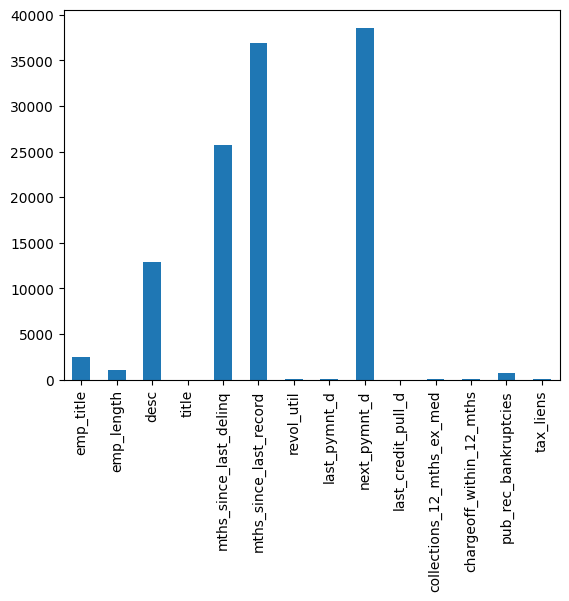

In [10]:
# to understand the missing values in each column of the data-set, ploting the bar chart

loan.isnull().sum()[loan.isnull().sum() > 0].plot(kind='bar')

In [11]:
# from the above chart, we can see there are some columns are having missing values
# deleting the columns where the null values are more then 10000

loan.drop(loan.columns[loan.apply(lambda col : col.isnull().sum() > 1000)], axis=1, inplace=True)

In [12]:
# checking for the rows and column data after deleting the missing values

loan.shape

(39717, 51)

In [13]:
# checking for the 'unique' values

loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                        82
initial_list_status               1
out_prncp                      1137
out_prncp_inv                  1138
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_prncp                7976
total_rec_int                 35148
total_rec_late_fee             1356
recoveries                     4040
collection_recovery_fee        2616
last_pymnt_d                    101
last_pymnt_amnt               34930
last_credit_pull_d              106
collections_12_mths_ex_med        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

In [14]:
# there are so many columns are having single values, lets delete those columns

loan.drop(loan.columns[loan.apply(lambda cols : cols.nunique() == 1)], axis=1, inplace=True)

In [15]:
# checking the rows and columns data after deleting the missing and single values

loan.shape

(39717, 42)

In [16]:
# lets check for the columns data

loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
# lets delete the unwanted columns

cols_to_be_deleted = ['id', 'member_id', 'url', 'title', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_credit_pull_d']

loan.drop(cols_to_be_deleted, axis=1, inplace=True)

In [18]:
# checking the info after deleting the unwanted columns

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  zip_code              39717 non-null  object 
 15  addr_state         

In [21]:
# Now checking for the null/missing values if we miss any

null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [23]:
# removing the 'revol_util' & 'pub_rec_bankruptcies' columns as those are having null values

loan.dropna(subset=['revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [24]:
loan.shape

(38970, 29)

In [26]:
#Removing current loan status rows

loan = loan[loan.loan_status != 'Current']

In [27]:
#Checking unique values for term column

loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [30]:
# if we observer, there is an empty space before 36 and 60, we need to remove it

loan['term'] = loan.term.str.strip()

<ipython-input-30-5c86f6a6ec1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['term'] = loan.term.str.strip()


In [31]:
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [32]:
# checking for the data type

loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

In [33]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv       term int_rate  installment  \
0       5000         5000           4975.0  36 months   10.65%       162.87   
1       2500         2500           2500.0  60 months   15.27%        59.83   
2       2400         2400           2400.0  36 months   15.96%        84.33   
3      10000        10000          10000.0  36 months   13.49%       339.31   
5       5000         5000           5000.0  36 months    7.90%       156.46   

  grade sub_grade home_ownership  annual_inc  ... inq_last_6mths open_acc  \
0     B        B2           RENT     24000.0  ...              1        3   
1     C        C4           RENT     30000.0  ...              5        3   
2     C        C5           RENT     12252.0  ...              2        2   
3     C        C1           RENT     49200.0  ...              1       10   
5     A        A4           RENT     36000.0  ...              3        9   

  pub_rec revol_bal revol_util total_acc   total_pymnt  total_pymnt_inv  \
0       0     13648     83.70%         9   5863.155187          5833.84   
1       0      1687      9.40%         4   1008.710000          1008.71   
2       0      2956     98.50%        10   3005.666844          3005.67   
3       0      5598        21%        37  12231.890000         12231.89   
5       0      7963     28.30%        12   5632.210000          5632.21   

  last_pymnt_amnt  pub_rec_bankruptcies  
0          171.62                   0.0  
1          119.66                   0.0  
2          649.91                   0.0  
3          357.48                   0.0  
5          161.03                   0.0  

[5 rows x 29 columns]

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# if we observer the data, 'int_rate & revol_util' are having '%' symbols the data type of those two are 'Object',
# we need to remove % symbol and convert the data type to float

#removing the '%' symbol and converting the dtype to 'float'

loan['int_rate'] = loan.int_rate.str.strip('%').astype(float)
loan['revol_util'] = loan.revol_util.str.strip('%').astype(float)

In [37]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

In [39]:
# if we observer, 'issue_d & earliest_cr_line' are having date values, we need to convert the data type from 'object' to 'date' type.

#converting to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values,
#so subtracting values more than 2020  with 100 will give more actual time
loan['issue_d'] = loan['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [40]:
# checking for the data types after converts

loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
total_pymnt                    float64
total_pymnt_inv                float64
last_pymnt_amnt                float64
pub_rec_bankruptcies           float64
dtype: object

In [41]:
# Now creating the new columns for 'date' --> 'month & year'

# for issue_d column
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')
loan['issue_d_weekday'] = loan.issue_d.dt.weekday

#data type conversion of year and weekday

loan['issue_d_year'] = loan['issue_d_year'].astype(object)
loan['issue_d_weekday'] = loan['issue_d_weekday'].astype(object)

# for earliest_cr_line
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')

#data type conversion of year and weekday

loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].astype(object)

In [42]:
# creating approved loan amount ratio which is a ratio of funded amount by investor to requested loan amount

loan['approved_loan_amnt_ratio'] = round(loan.funded_amnt_inv*100/loan.loan_amnt,2)

In [43]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment  \
0       5000         5000           4975.0  36 months     10.65       162.87   
1       2500         2500           2500.0  60 months     15.27        59.83   
2       2400         2400           2400.0  36 months     15.96        84.33   
3      10000        10000          10000.0  36 months     13.49       339.31   
5       5000         5000           5000.0  36 months      7.90       156.46   

  grade sub_grade home_ownership  annual_inc  ...   total_pymnt  \
0     B        B2           RENT     24000.0  ...   5863.155187   
1     C        C4           RENT     30000.0  ...   1008.710000   
2     C        C5           RENT     12252.0  ...   3005.666844   
3     C        C1           RENT     49200.0  ...  12231.890000   
5     A        A4           RENT     36000.0  ...   5632.210000   

  total_pymnt_inv last_pymnt_amnt pub_rec_bankruptcies issue_d_year  \
0         5833.84          171.62                  0.0         2011   
1         1008.71          119.66                  0.0         2011   
2         3005.67          649.91                  0.0         2011   
3        12231.89          357.48                  0.0         2011   
5         5632.21          161.03                  0.0         2011   

  issue_d_month  issue_d_weekday  earliest_cr_line_year  \
0           Dec                3                   1985   
1           Dec                3                   1999   
2           Dec                3                   2001   
3           Dec                3                   1996   
5           Dec                3                   2004   

  earliest_cr_line_month  approved_loan_amnt_ratio  
0                    Jan                      99.5  
1                    Apr                     100.0  
2                    Nov                     100.0  
3                    Feb                     100.0  
5                    Nov                     100.0  

[5 rows x 35 columns]

# <font color='blue'>Checking and removing the outliers

<Axes: ylabel='annual_inc'>

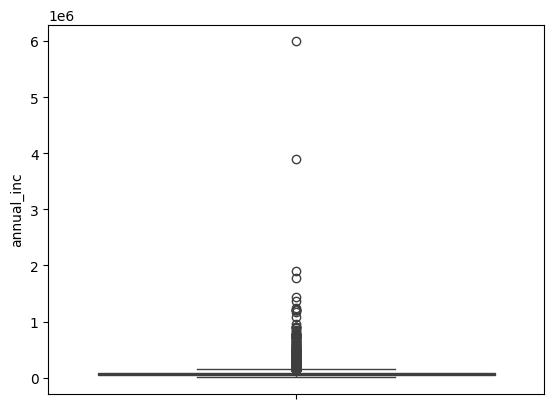

In [45]:
# firstly checking for the outliers for 'annual_inc' field

sns.boxplot(loan['annual_inc'])


In [46]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [47]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

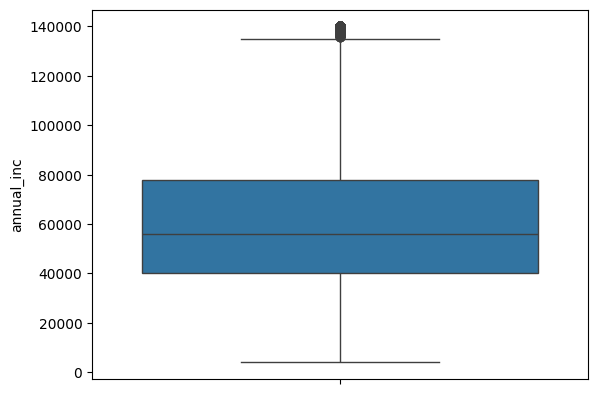

In [48]:
sns.boxplot(loan['annual_inc'])


* Now the "annual_inc" data looks good and proceeding next.


* Let's analyze other numerical variables which could possibly have outliers.
 - dti
 - loan_amnt
 - funded_amnt_inv

<Axes: ylabel='dti'>

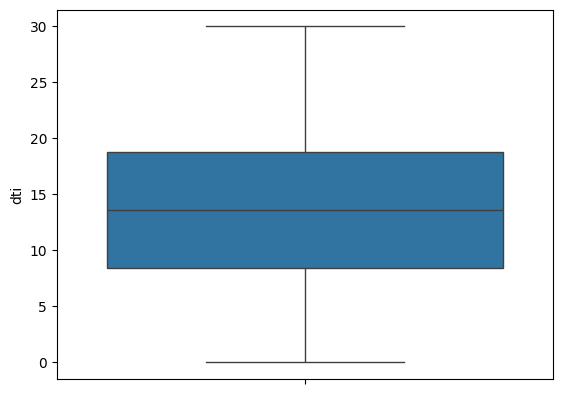

In [49]:
sns.boxplot(loan.dti)

<Axes: ylabel='loan_amnt'>

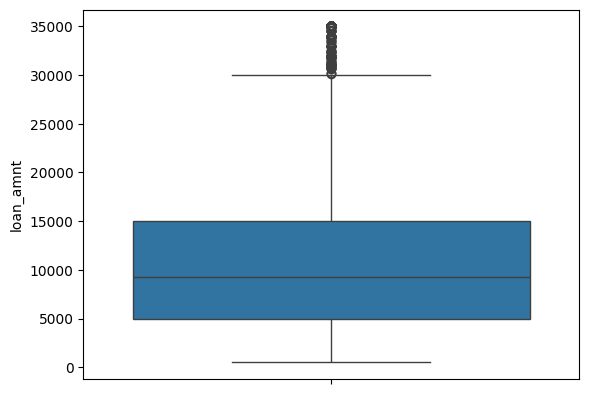

In [50]:
sns.boxplot(loan.loan_amnt)

In [51]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25975.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

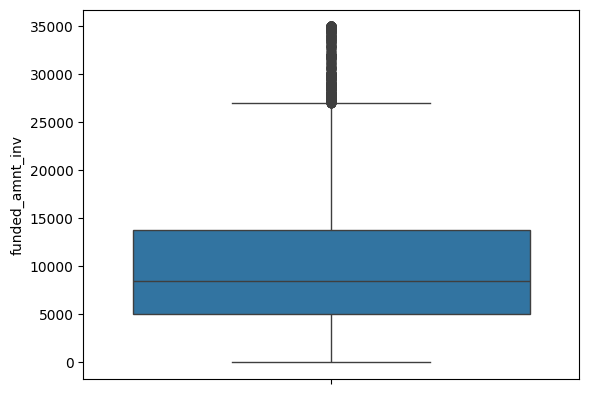

In [52]:
sns.boxplot(loan.funded_amnt_inv)

In [53]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8500.0
0.750    13800.0
0.900    19800.0
0.950    23975.0
0.970    24975.0
0.975    25600.0
0.980    27975.0
0.985    29950.0
0.990    32000.0
1.000    35000.0
Name: funded_amnt_inv, dtype: float64

* Though there are some values far from distribution, the distribution is pretty
continousand there is no need to remove outliers / extreme values for these above columns (loan_amnt &  funded_amnt_inv).

# <font color='blue'>Visualizing Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

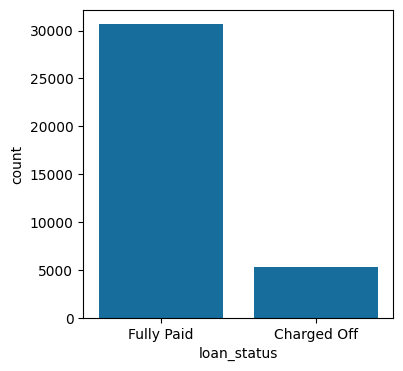

In [194]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'loan_status', data = loan)

In [55]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

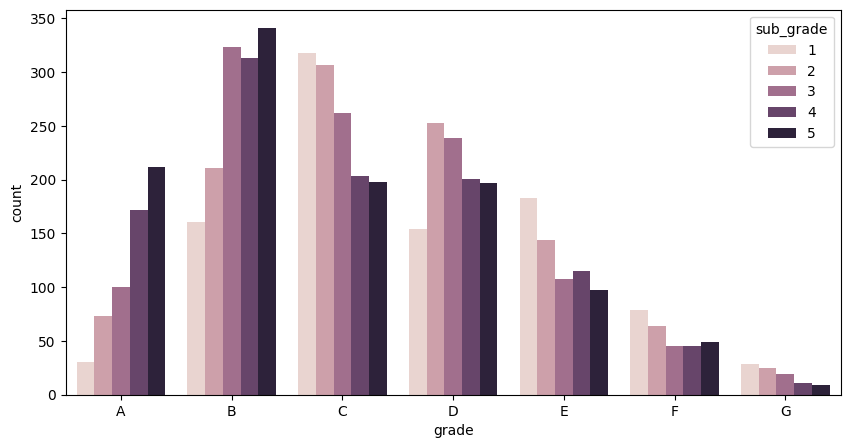

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade', data = loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

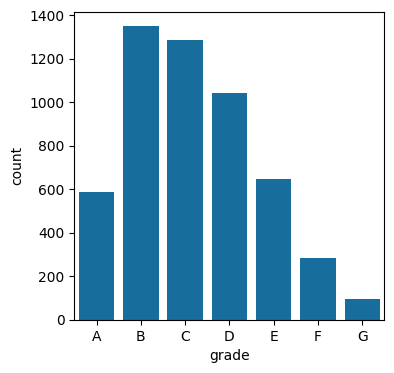

In [195]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# <font color='blue'>Analyzing home_ownership

In [58]:
#checking unique values for home_ownership

loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [63]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

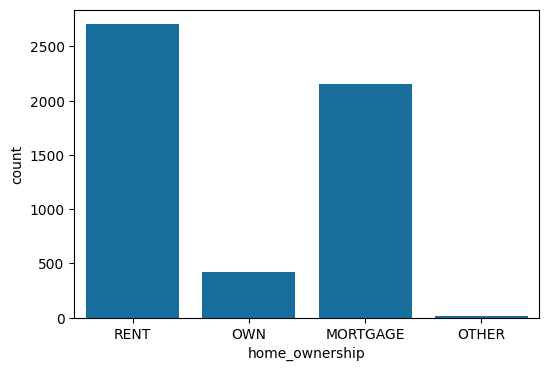

In [68]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

### <font color='blue'>Analyzing purpose

<Axes: xlabel='count', ylabel='purpose'>

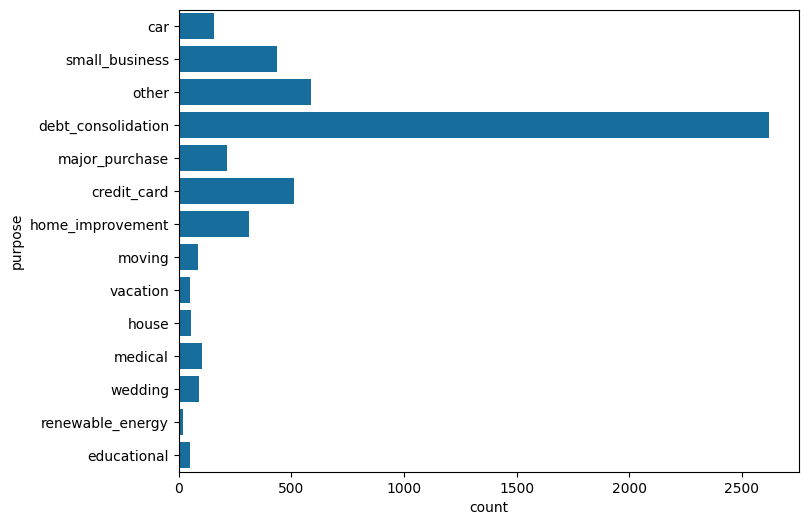

In [71]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

## <font color='blue'>Creating bins for some numerical variable to make them categorical

In [72]:
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [73]:
# Viewing new bins created
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment  \
0       5000         5000           4975.0  36 months     10.65       162.87   
1       2500         2500           2500.0  60 months     15.27        59.83   
2       2400         2400           2400.0  36 months     15.96        84.33   
3      10000        10000          10000.0  36 months     13.49       339.31   
5       5000         5000           5000.0  36 months      7.90       156.46   

  grade  sub_grade home_ownership  annual_inc  ... issue_d_month  \
0     B          2           RENT     24000.0  ...           Dec   
1     C          4           RENT     30000.0  ...           Dec   
2     C          5           RENT     12252.0  ...           Dec   
3     C          1           RENT     49200.0  ...           Dec   
5     A          4           RENT     36000.0  ...           Dec   

  issue_d_weekday earliest_cr_line_year earliest_cr_line_month  \
0               3                  1985                    Jan   
1               3                  1999                    Apr   
2               3                  2001                    Nov   
3               3                  1996                    Feb   
5               3                  2004                    Nov   

  approved_loan_amnt_ratio int_rate_groups  open_acc_groups  \
0                     99.5          9%-13%             2-10   
1                    100.0         13%-17%             2-10   
2                    100.0         13%-17%             2-10   
3                    100.0         13%-17%             2-10   
5                    100.0           5%-9%             2-10   

   revol_util_groups total_acc_groups  annual_inc_groups  
0             80-100             2-20             3k-31k  
1               0-20             2-20             3k-31k  
2             80-100             2-20             3k-31k  
3              20-40            20-37            31k-58k  
5              20-40             2-20            31k-58k  

[5 rows x 40 columns]

### <font color='blue'>Analyzing interest rate wrt the interest rate bins created

<Axes: xlabel='int_rate_groups', ylabel='count'>

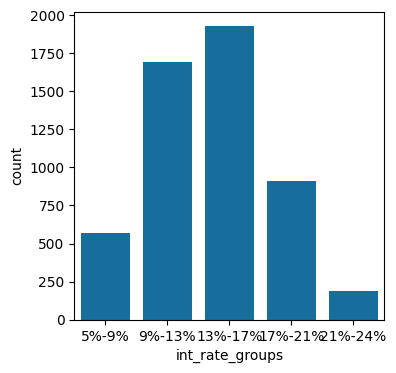

In [196]:
plt.figure(figsize=(4,4))
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

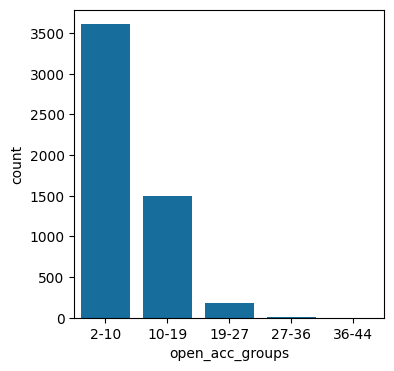

In [197]:
# analyzing open_acc,revol_util,total_acc,annual_inc

plt.figure(figsize=(4,4))
sns.countplot(x='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

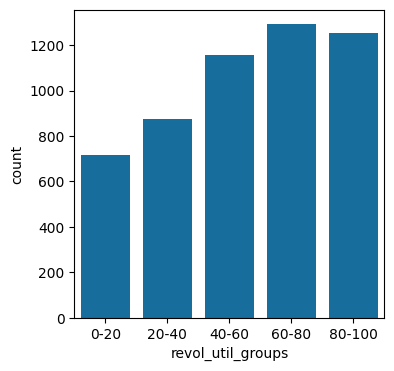

In [198]:
plt.figure(figsize=(4,4))
sns.countplot(x='revol_util_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

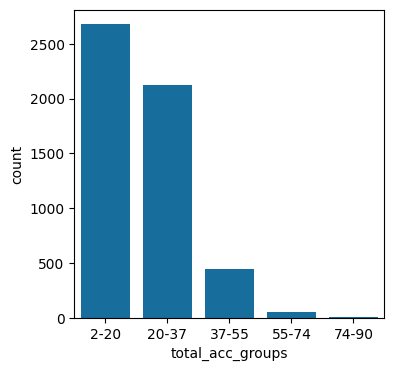

In [199]:
plt.figure(figsize=(4,4))
sns.countplot(x='total_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

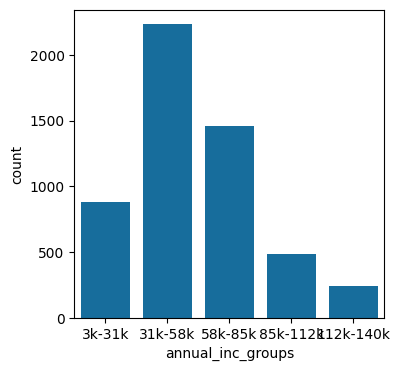

In [200]:
plt.figure(figsize=(4,4))
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

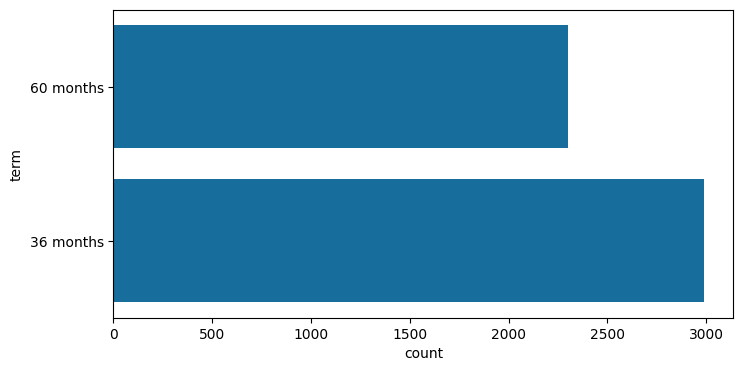

In [203]:
# Loan status

plt.figure(figsize=(8,4))
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

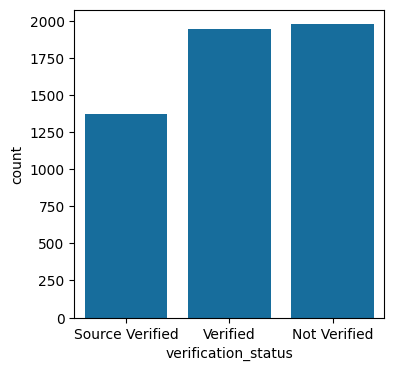

In [204]:
# Verification Status

plt.figure(figsize=(4,4))
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

In [86]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment  \
0       5000         5000           4975.0  36 months     10.65       162.87   
1       2500         2500           2500.0  60 months     15.27        59.83   
2       2400         2400           2400.0  36 months     15.96        84.33   
3      10000        10000          10000.0  36 months     13.49       339.31   
5       5000         5000           5000.0  36 months      7.90       156.46   

  grade  sub_grade home_ownership  annual_inc  ... issue_d_month  \
0     B          2           RENT     24000.0  ...           Dec   
1     C          4           RENT     30000.0  ...           Dec   
2     C          5           RENT     12252.0  ...           Dec   
3     C          1           RENT     49200.0  ...           Dec   
5     A          4           RENT     36000.0  ...           Dec   

  issue_d_weekday earliest_cr_line_year earliest_cr_line_month  \
0               3                  1985                    Jan   
1               3                  1999                    Apr   
2               3                  2001                    Nov   
3               3                  1996                    Feb   
5               3                  2004                    Nov   

  approved_loan_amnt_ratio int_rate_groups  open_acc_groups  \
0                     99.5          9%-13%             2-10   
1                    100.0         13%-17%             2-10   
2                    100.0         13%-17%             2-10   
3                    100.0         13%-17%             2-10   
5                    100.0           5%-9%             2-10   

   revol_util_groups total_acc_groups  annual_inc_groups  
0             80-100             2-20             3k-31k  
1               0-20             2-20             3k-31k  
2             80-100             2-20             3k-31k  
3              20-40            20-37            31k-58k  
5              20-40             2-20            31k-58k  

[5 rows x 40 columns]

<Axes: xlabel='issue_d_month', ylabel='count'>

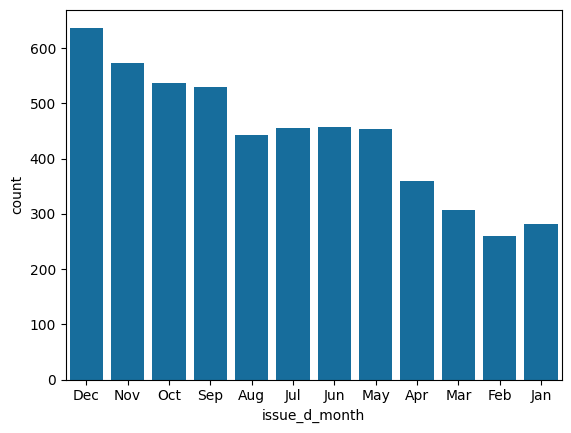

In [92]:
sns.countplot(x='issue_d_month', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='issue_d_year', ylabel='count'>

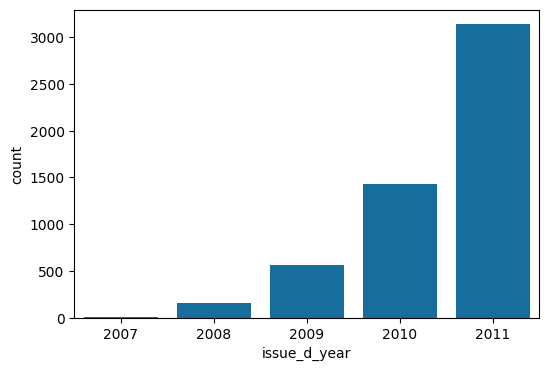

In [205]:
plt.figure(figsize=(6,4))
sns.countplot(x='issue_d_year', data=loan[loan['loan_status']=='Charged Off'])

# You can find that loan scantioned/issues on December having maximum defaults counts and in the year 2011 also having high number of defaults

In [94]:
# Analyzing installment,dti, loan_amnt


loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '14-145'),
  Text(1, 0, '145-274'),
  Text(2, 0, '274-403'),
  Text(3, 0, '403-531'),
  Text(4, 0, '531-660'),
  Text(5, 0, '660-789'),
  Text(6, 0, '789-918'),
  Text(7, 0, '918-1047'),
  Text(8, 0, '1047-1176'),
  Text(9, 0, '1176-1305')])

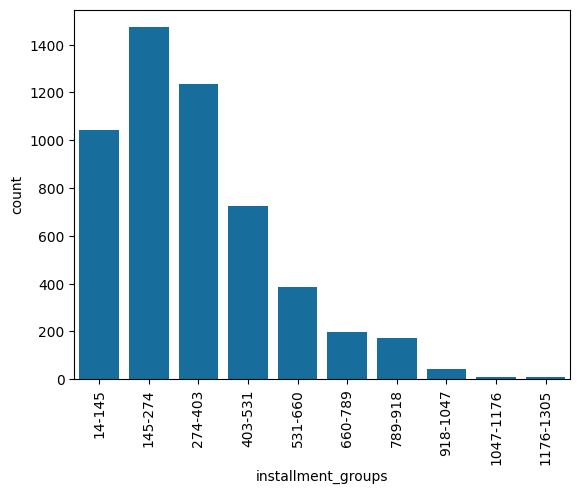

In [99]:
# analysing Installment

sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])
plt.xticks(rotation=90)

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

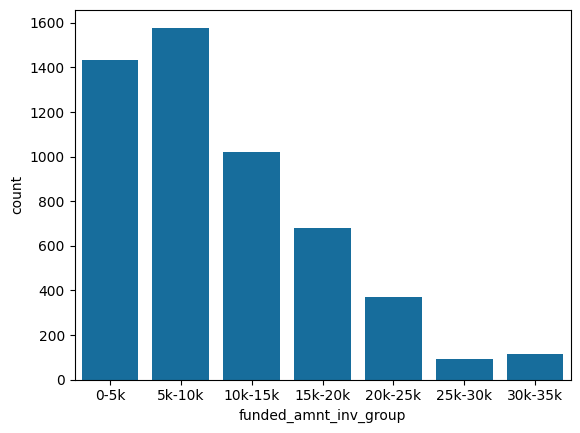

In [100]:
# analysing Fund amound investment

sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

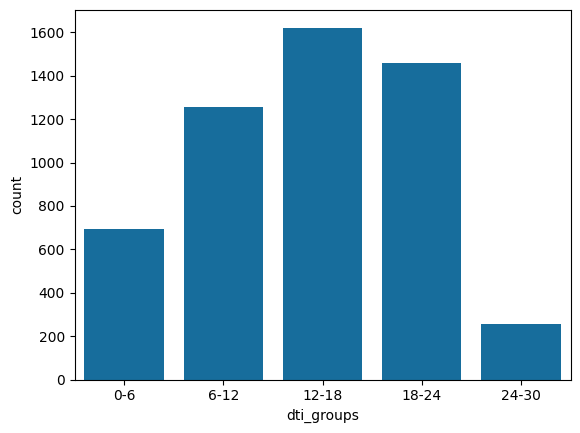

In [101]:
# analysing DTI

sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

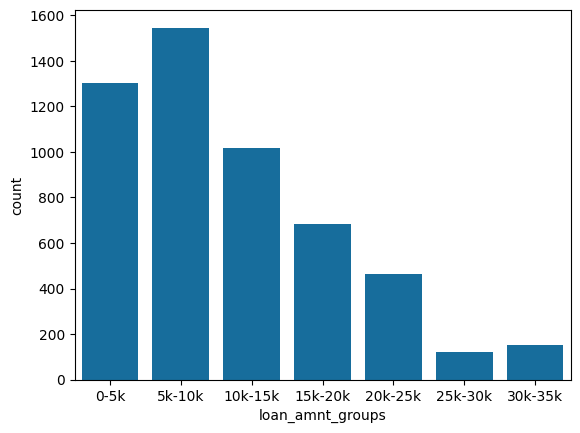

In [96]:
# analysing Loan amount

sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

# <font color='blue'>Univariate Analysis


<Axes: xlabel='term', ylabel='loan_amnt'>

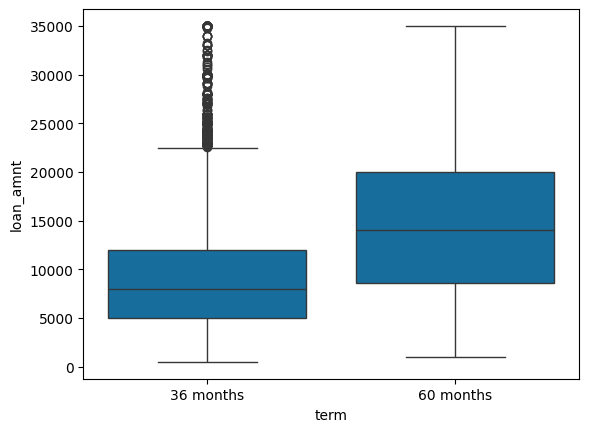

In [109]:
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)

<Axes: xlabel='grade', ylabel='loan_amnt'>

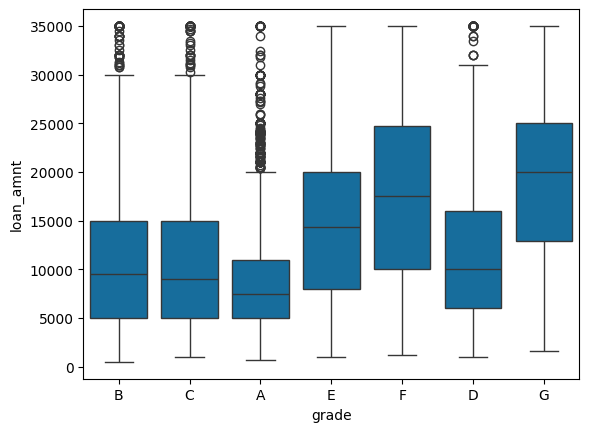

In [117]:
#Finding grades with sorted alphabetical order

sns.boxplot(x='grade', y=loan.loan_amnt, data=loan)

<Axes: xlabel='annual_inc', ylabel='purpose'>

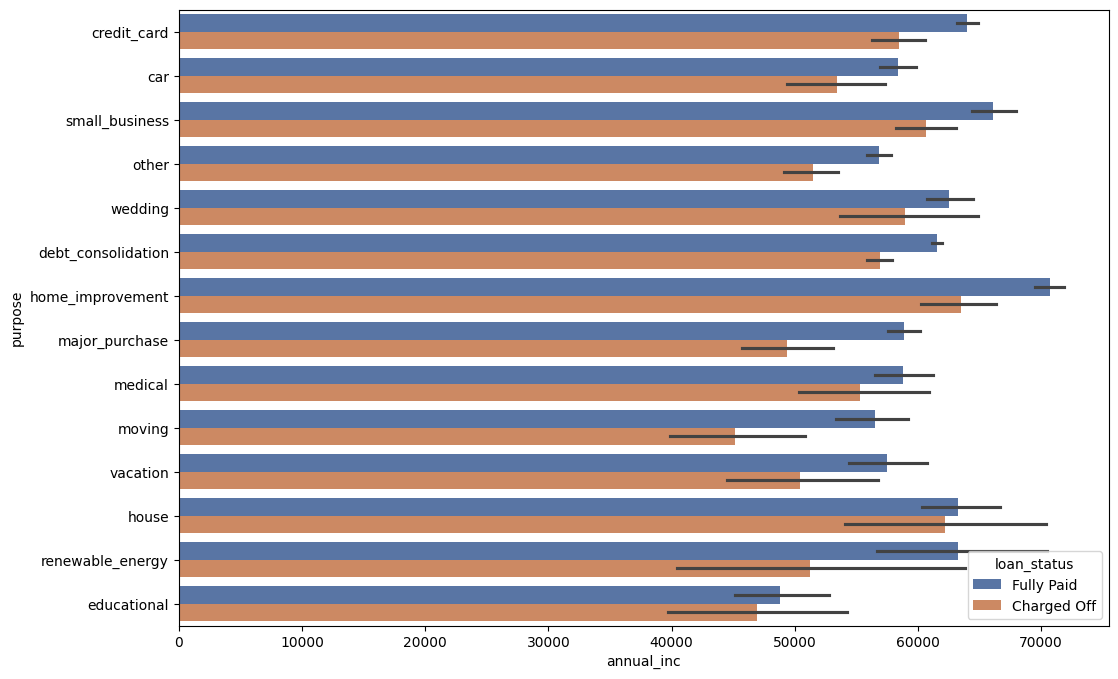

In [123]:
# Analysing the Annual income vs loan rationale or purpose

plt.figure(figsize=(12,8))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")

<Axes: xlabel='home_ownership', ylabel='annual_inc'>

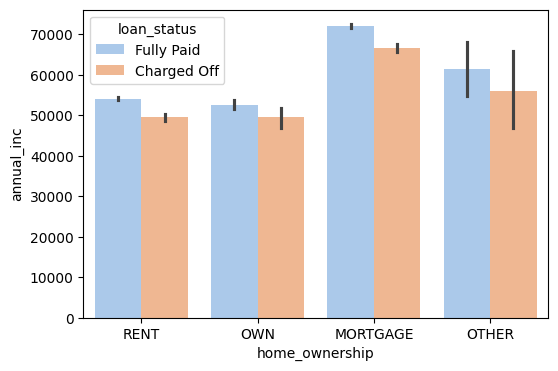

In [127]:
# Annual income vs home ownership

plt.figure(figsize=(6,4))
sns.barplot(data = loan, x='home_ownership' , y='annual_inc', hue ='loan_status', palette = "pastel")

<Axes: xlabel='loan_amnt', ylabel='home_ownership'>

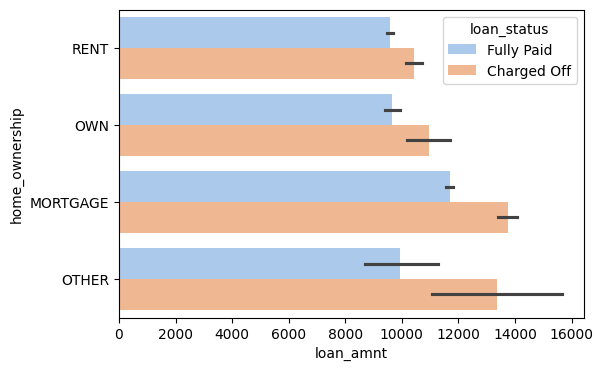

In [130]:
# Loan amount vs month issued and year issued

plt.figure(figsize=(6,4))
sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

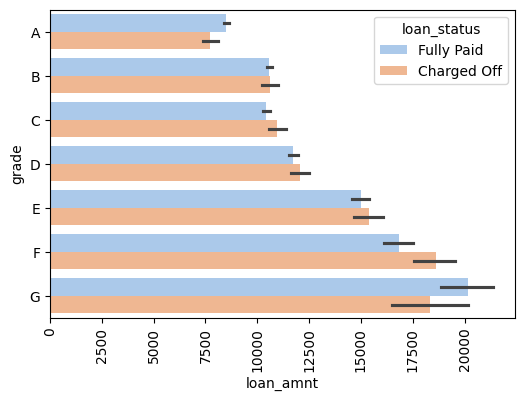

In [134]:
# Loan amount vs Grade

plt.figure(figsize=(6,4))
sns.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.xticks(rotation=90)

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

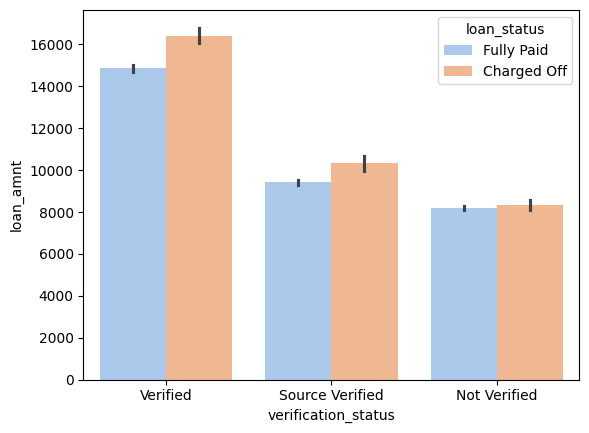

In [135]:
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '0-5k'),
  Text(1, 0, '5k-10k'),
  Text(2, 0, '10k-15k'),
  Text(3, 0, '15k-20k'),
  Text(4, 0, '20k-25k'),
  Text(5, 0, '25k-30k'),
  Text(6, 0, '30k-35k')])

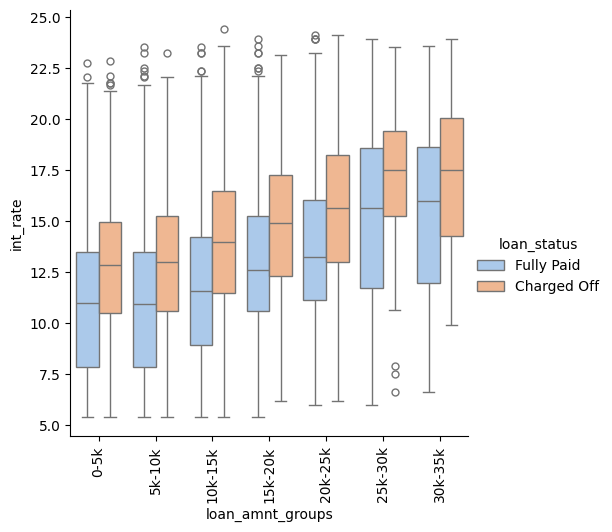

In [137]:
# Grade VS interest

sns.catplot(data =loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')
plt.xticks(rotation=90)

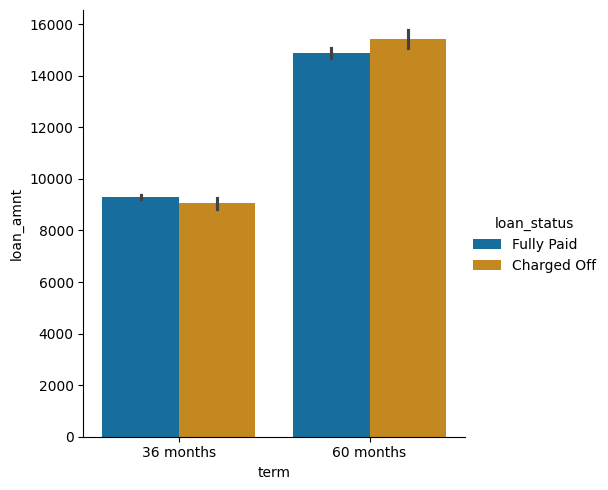

In [138]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan, hue = 'loan_status', kind = 'bar')

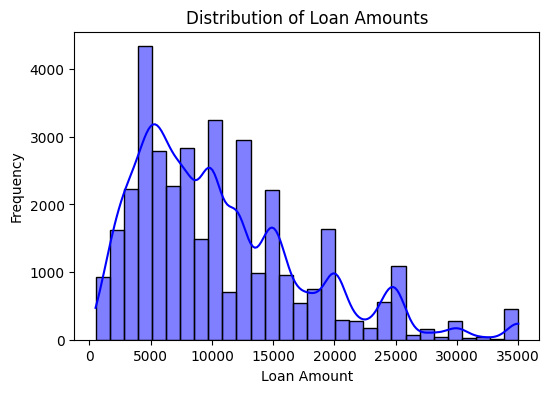

In [146]:
# Histogram for Loan Amount

plt.figure(figsize=(6, 4))
sns.histplot(loan['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

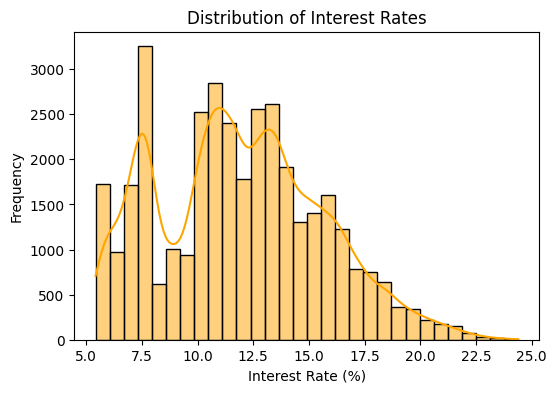

In [147]:
# Histogram for Interest Rate

plt.figure(figsize=(6,4))
sns.histplot(loan['int_rate'], bins=30, kde=True, color='orange')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

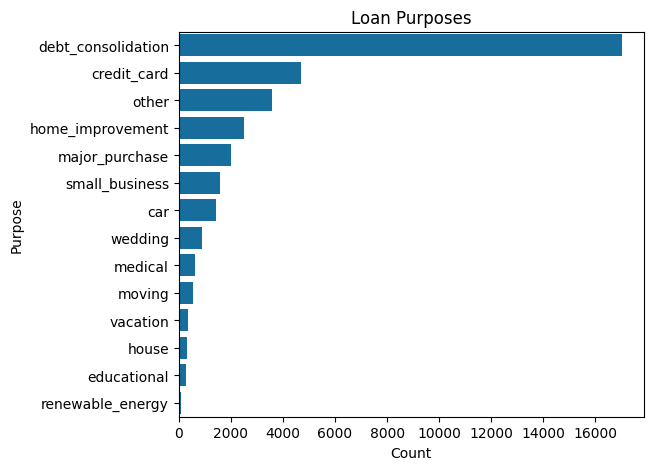

In [150]:
# Bar Chart for Loan Purpose

plt.figure(figsize=(6,5))
sns.countplot(y='purpose', data=loan, order=loan['purpose'].value_counts().index)
plt.title('Loan Purposes')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

# <font color='blue'>Bivariate Analysis

**Relationships: Loan Amount vs. Purpose, Interest Rate vs. Loan Status, Income vs. Loan Amount**

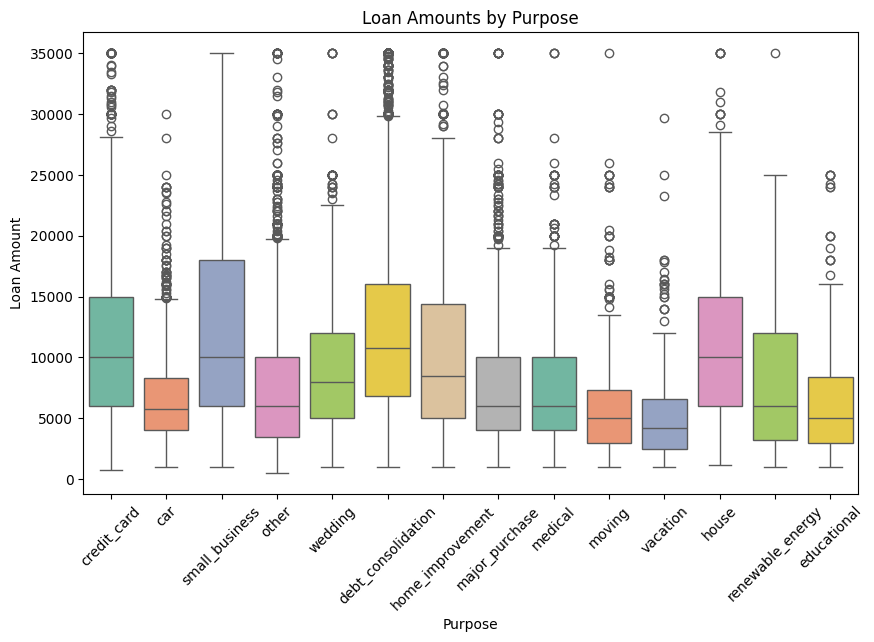

In [154]:
# Boxplot: Loan Amount by Purpose

plt.figure(figsize=(10, 6))
sns.boxplot(x='purpose', y='loan_amnt', data=loan, palette='Set2')
plt.xticks(rotation=45)
plt.title('Loan Amounts by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.show()

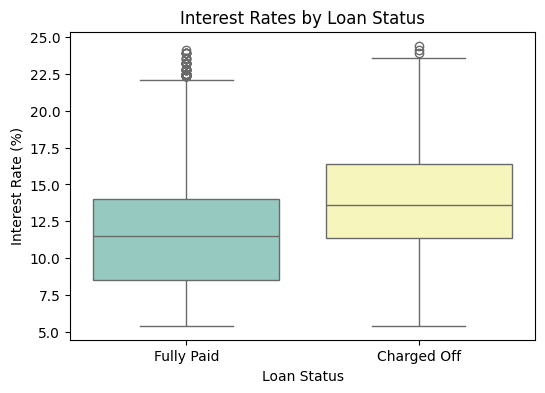

In [153]:
# Boxplot: Interest Rate by Loan Status


plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='int_rate', data=loan, palette='Set3')
plt.title('Interest Rates by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()


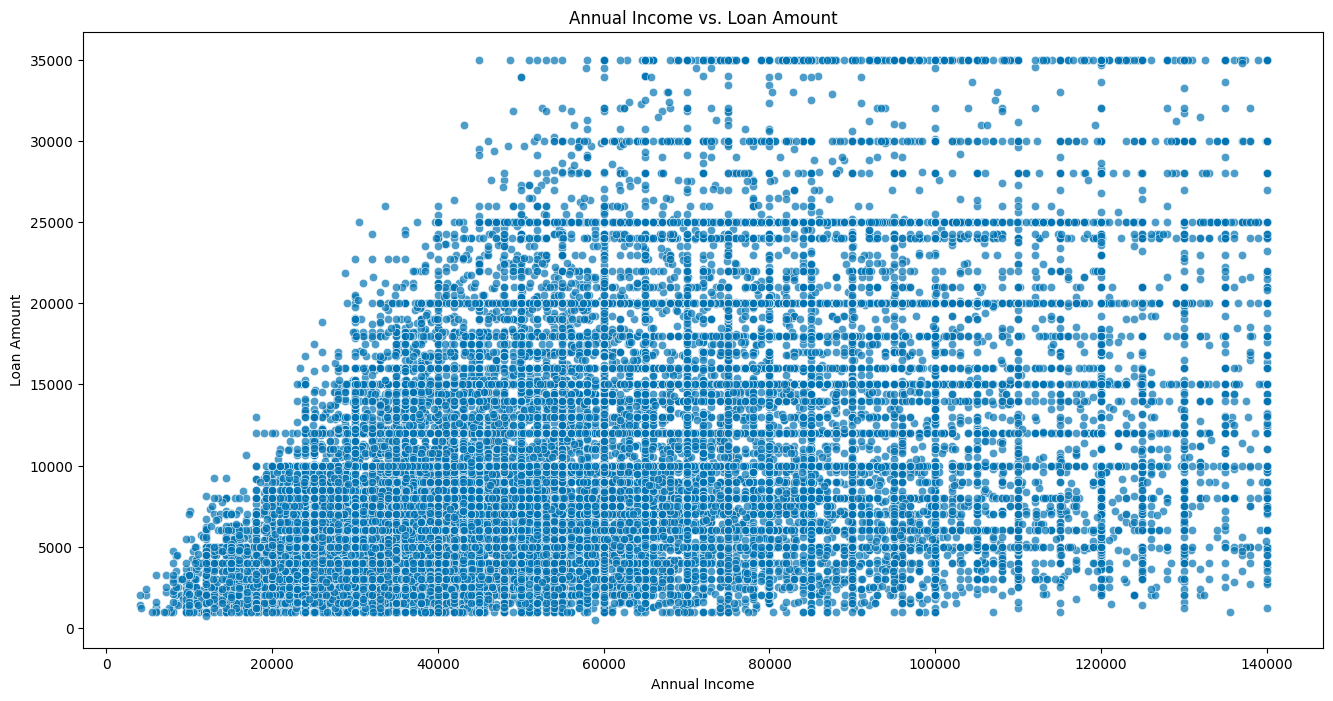

In [158]:
# Scatterplot: Annual Income vs. Loan Amount


plt.figure(figsize=(16,8))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan, alpha=0.7)
plt.title('Annual Income vs. Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# <font color='blue'>Multivariate Analysis

**Loan Amount, Loan Purpose, and Interest Rate**

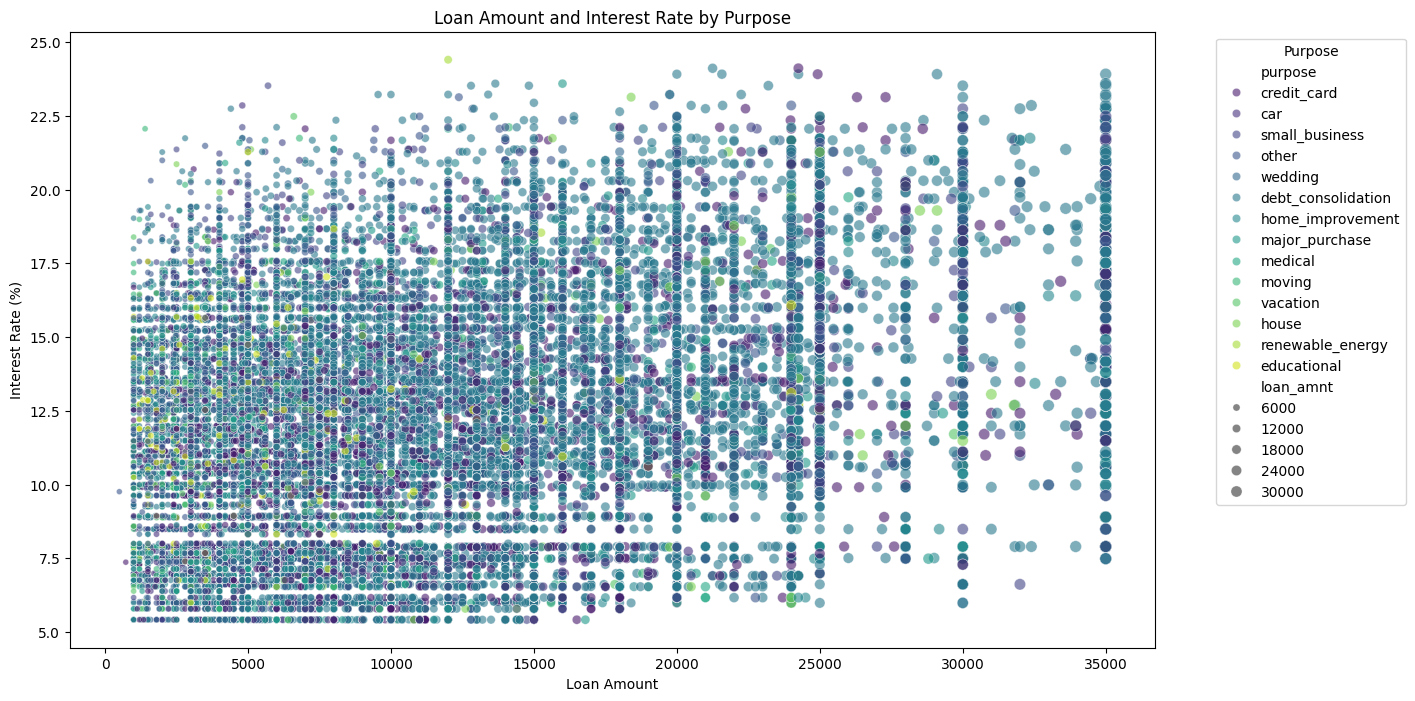

In [160]:
# Bubble Plot: Loan Amount, Purpose, and Interest Rate


plt.figure(figsize=(14, 8))
sns.scatterplot(x='loan_amnt', y='int_rate', size='loan_amnt', hue='purpose', data=loan, alpha=0.6, palette='viridis')
plt.title('Loan Amount and Interest Rate by Purpose')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# <font color='blue'>Correlation Analysis

In [162]:
loan.dtypes

loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                            int64
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec                              int64
revol_bal                            int64
revol_util                         float64
total_acc                            int64
total_pymnt                        float64
total_pymnt_inv                    float64
last_pymnt_amnt                    float64
pub_rec_bankruptcies               float64
issue_d_year                        object
issue_d_month                       object
issue_d_weekday                     object
earliest_cr_line_year               object
earliest_cr_line_month              object
approved_loan_amnt_ratio           float64
int_rate_groups                   category
open_acc_groups                   category
revol_util_groups                 category
total_acc_groups                  category
annual_inc_groups                 category
installment_groups                category
funded_amnt_inv_group             category
loan_amnt_groups                  category
dti_groups                        category
dtype: object

In [184]:
continious_data_cols = ['loan_amnt','funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                        'open_acc', 'pub_rec', 'revol_bal','total_pymnt','total_pymnt_inv', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'approved_loan_amnt_ratio']

In [185]:
corr_for_defaulters = loan[loan['loan_status']=='Charged Off'][continious_data_cols]
corr_for_defaulters.head()

loan_amnt  funded_amnt  funded_amnt_inv  installment  int_rate  \
1        2500         2500           2500.0        59.83     15.27   
8        5600         5600           5600.0       152.39     21.28   
9        5375         5375           5350.0       121.45     12.69   
12       9000         9000           9000.0       305.38     13.49   
14      10000        10000          10000.0       325.74     10.65   

    annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
1      30000.0   1.00            0               5         3        0   
8      40000.0   5.55            0               2        11        0   
9      15000.0  18.08            0               0         2        0   
12     30000.0  10.08            0               1         4        0   
14    100000.0   7.06            0               2        14        0   

    revol_bal  total_pymnt  total_pymnt_inv  last_pymnt_amnt  \
1        1687      1008.71          1008.71           119.66   
8        5210       646.02           646.02           152.39   
9        9279      1476.19          1469.34           121.45   
12      10452      2270.70          2270.70           305.38   
14      11997      7471.99          7471.99           325.74   

    pub_rec_bankruptcies  approved_loan_amnt_ratio  
1                    0.0                    100.00  
8                    0.0                    100.00  
9                    0.0                     99.53  
12                   0.0                    100.00  
14                   0.0                    100.00

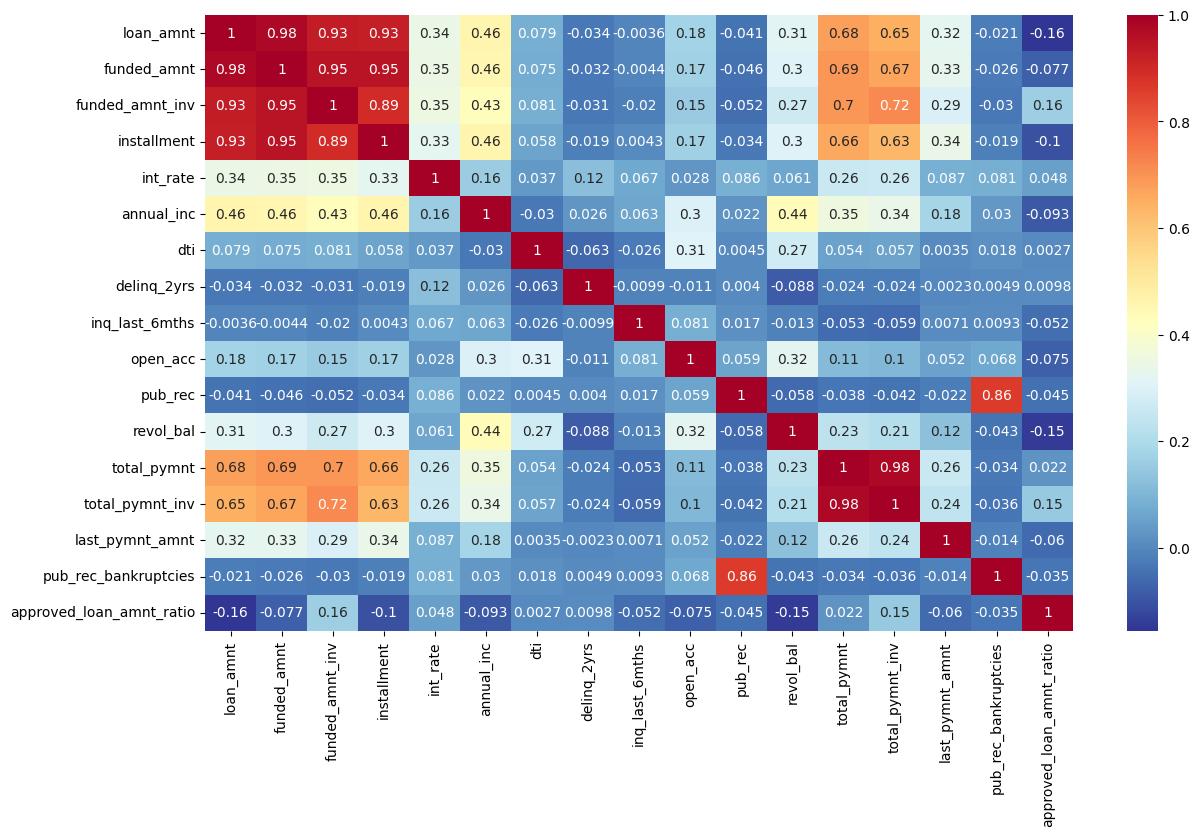

In [186]:
# Heatmap: Correlation Between Numerical Variables

plt.figure(figsize = (14,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

# <font color='blue'>Key Takeaways from this Correlation Matrix:

* **Strong Positive Correlations:** You can see strong positive correlations (red squares with values close to 1) between variables like:
 - `loan_amnt`, `funded_amnt`, `funded_amnt_inv` and `installment` (which makes sense, as the amount of the loan is closely related to the amount funded).
 - `total_pymnt` and `total_pymnt_inv` (total payment received is correlated with the total payment invested).
* **Some Negative Correlations:** There are some negative correlations (blue squares), though they are generally weaker than the positive ones. For example, `int_rate` (interest rate) has a slight negative correlation with `last_pymnt_amnt` (last payment amount).

This correlation matrix helps to understand the relationships between different factors in a loan dataset. It can be useful for tasks like:

* **Feature Selection:** Identifying highly correlated variables that might be redundant in a machine learning model.
* **Data Analysis**: Understanding the underlying relationships in your data.
* **Risk Assessment:** Identifying factors that might be associated with loan defaults (though this matrix alone doesn't provide that information directly).

# <font color='blue'>Summary and Business Insights

**To automate the summary of insights:**

In [175]:
# Group loans by purpose to calculate average loan amount


loan_summary = loan.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False)
print("Average Loan Amount by Purpose:\n\n", loan_summary)

Average Loan Amount by Purpose:

 purpose
small_business        12763.262389
debt_consolidation    12218.438768
house                 11853.293413
credit_card           11280.726168
home_improvement      10472.712808
wedding                9556.550343
renewable_energy       8123.947368
medical                7794.075829
major_purchase         7738.958952
other                  7670.578801
car                    6652.603075
educational            6565.034364
moving                 6037.662338
vacation               5294.273743
Name: loan_amnt, dtype: float64


In [177]:
# Default rates by interest rate category


loan['int_rate_category'] = pd.cut(loan['int_rate'], bins=[0, 10, 15, 20, 25, 30], labels=['0-10%', '10-15%', '15-20%', '20-25%', '25-30%'])
default_rate = loan[loan['loan_status'] == 'Charged Off'].groupby('int_rate_category').size() / loan.groupby('int_rate_category').size()
print("Default Rates by Interest Rate Category:\n\n", default_rate)

Default Rates by Interest Rate Category:

 int_rate_category
0-10%     0.068097
10-15%    0.149779
15-20%    0.251336
20-25%    0.397015
25-30%         NaN
dtype: float64


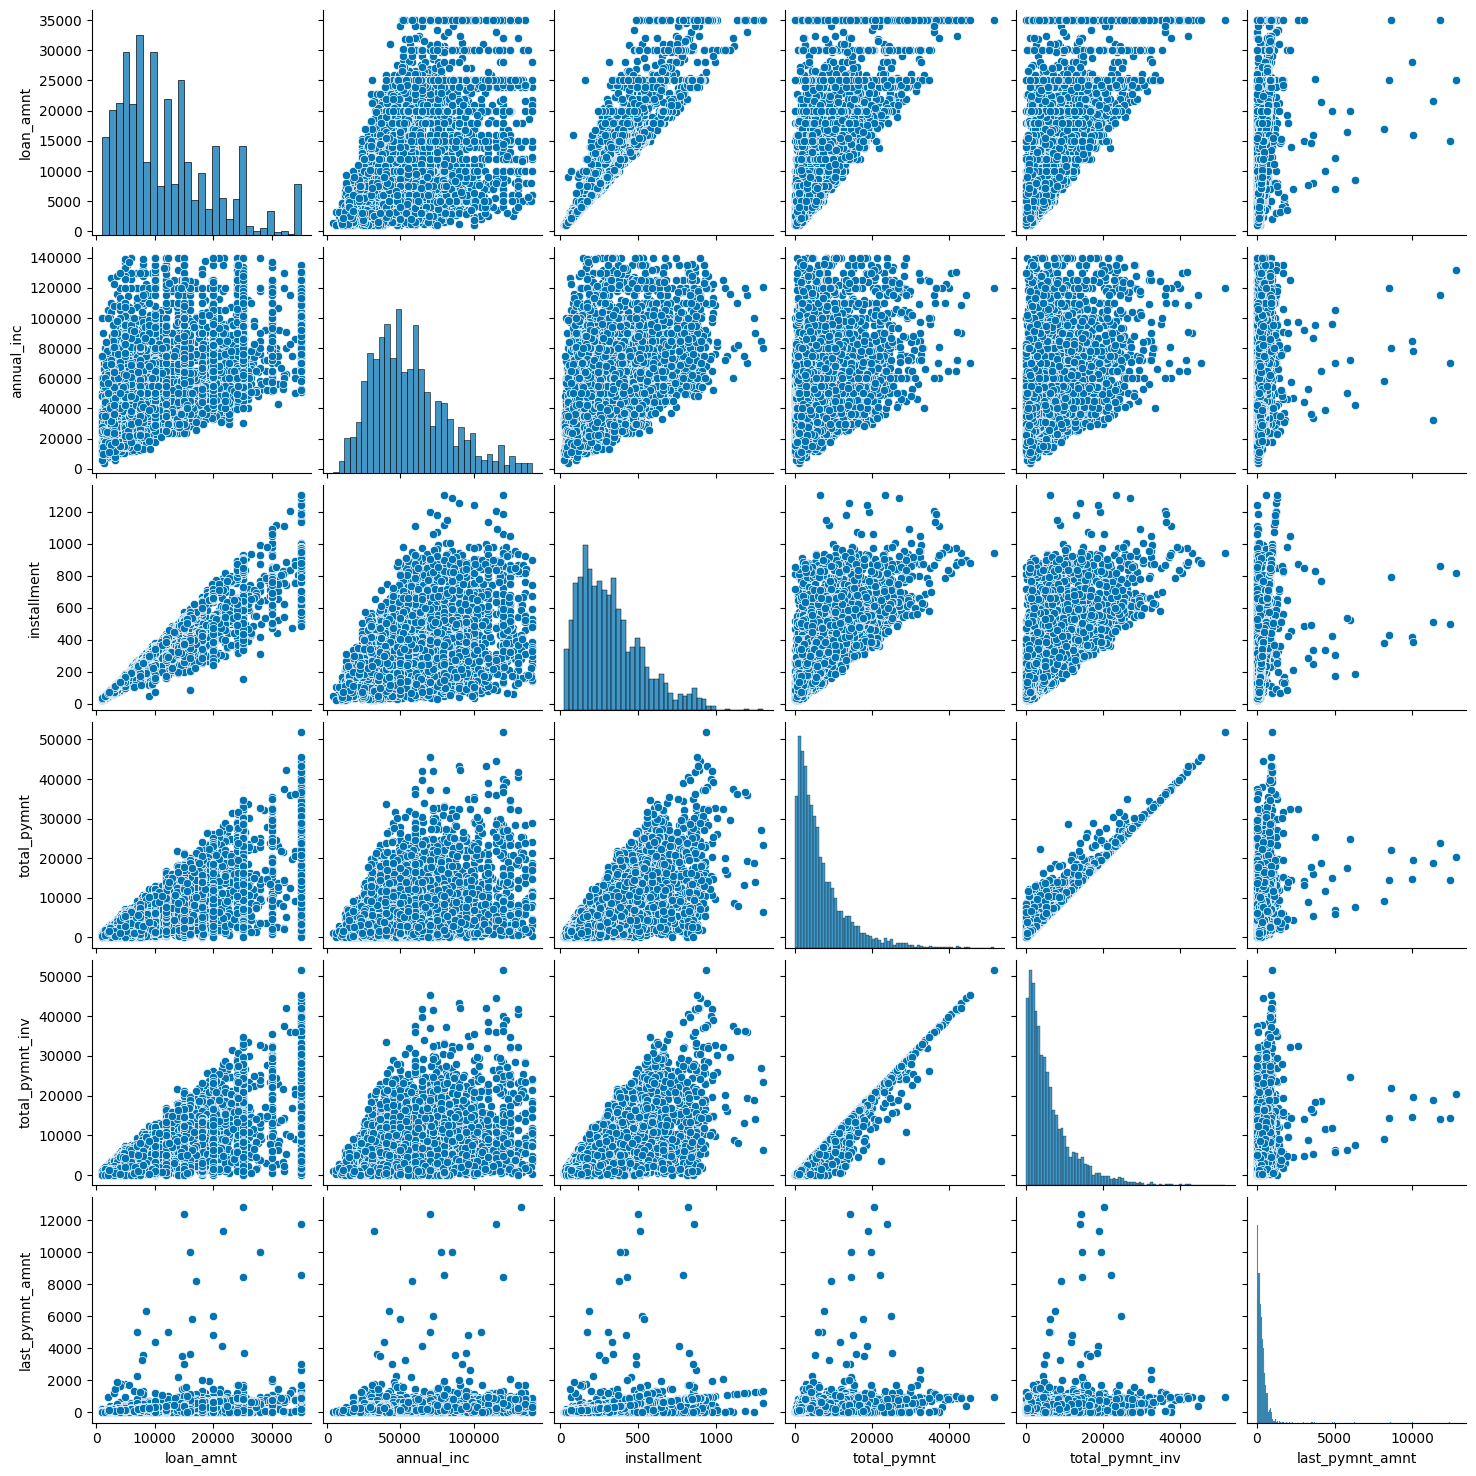

In [192]:
sns.pairplot(loan[loan['loan_status']=='Charged Off'][['loan_amnt', 'annual_inc', 'installment', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt']])

# <font color='blue'>Key Takeaways from this Pairplot

* **The diagonal shows histograms:** Each histogram displays the distribution of a single variable. For instance, the top-left square shows the distribution of loan_amnt, giving you an idea of how frequently different loan amounts occur.

* **Off-diagonal squares show scatterplots:** Each scatterplot compares two different variables. For example, the square in the first row, second column shows the relationship between `loan_amnt` and `annual_inc`. Each point in the scatterplot represents an individual data point with its corresponding loan amount and annual income.